In [ ]:
#Importing necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Load the dataset
df = pd.read_csv('appliance_energy.csv')
df

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201
...,...,...
95,24.875912,2.079686
96,25.454657,2.506915
97,23.550820,2.525658
98,15.508383,1.689184


In [ ]:
df.head()

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


In [ ]:
df.tail()

,Temperature (°C),Energy Consumption (kWh)
95,24.875912,2.079686
96,25.454657,2.506915
97,23.550820,2.525658
98,15.508383,1.689184
99,17.157829,2.129374


In [ ]:
#Find missing value
df.isnull().sum()

,0
Temperature (°C),0
Energy Consumption (kWh),0


In [ ]:
df.isnull().mean()

,0
Temperature (°C),0.0
Energy Consumption (kWh),0.0


In [ ]:
#if we had missing values-df.dropna()-df.fillna('ffill')

In [ ]:
#Feature and target selection
X = df[['Temperature (°C)']]
y = df['Energy Consumption (kWh)']

In [ ]:
#Split the data into training & testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(80, 1)

In [ ]:
X_test.shape

(20, 1)

In [ ]:
y_test.shape

(20,)

In [ ]:
y_train.shape

(80,)

In [ ]:
#Model(linear regression model)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Train
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predict
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.16342487842925055
R-squared: 0.6119478445218713


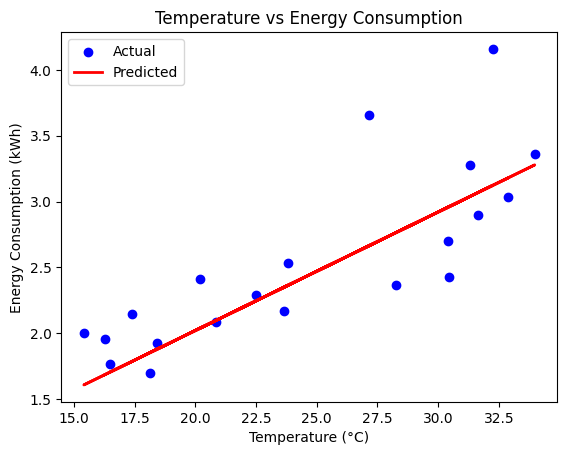

In [ ]:
#plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Temperature vs Energy Consumption')
plt.legend()
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'LR_model.pkl')

['LR_model.pkl']

In [ ]:
#Polynomial Regression
#import libs
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Load the dataset
data = pd.read_csv('/content/sustainability_data.csv')
data

,Year,Energy_Consumption,Renewable_Percentage,GDP,CO2_Emissions
0,2000,517,13.823292,985,816.163479
1,2001,516,24.170636,1334,869.155993
2,2002,468,28.369161,1604,883.858124
3,2003,531,19.401217,1668,947.372230
4,2004,483,26.920520,1254,837.837492
5,2005,468,10.324833,1998,972.326383
6,2006,591,11.965205,1579,974.253008
7,2007,597,29.031429,1242,873.456144
8,2008,592,23.053935,1811,963.445540
9,2009,524,26.122908,1375,864.651884


In [ ]:
data.columns

Index(['Year', 'Energy_Consumption', 'Renewable_Percentage', 'GDP',
       'CO2_Emissions'],
      dtype='object')

In [ ]:
#Feature selection
X = data[['Year', 'Energy_Consumption','Renewable_Percentage','GDP']]
y = data['CO2_Emissions']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)


In [ ]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

In [ ]:
p_model = LinearRegression()
p_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_p = p_model.predict(X_test_poly)
y_pred_p

array([ 868.13125294,  853.06776444, 1009.46776867,  860.81847341,
       1030.13834393])

In [ ]:
mse_p = mean_squared_error(y_test, y_pred_p)
r2_p = r2_score(y_test, y_pred_p)
print(f"Mean Squared Error:", mse_p)
print(f"R-squared:", r2_p)

Mean Squared Error: 6894.4501724166785
R-squared: -1.5939108775542161


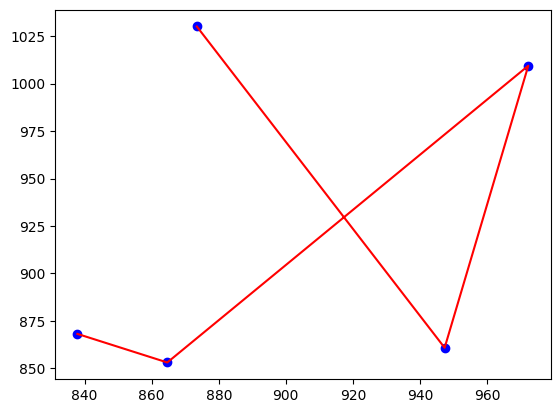

In [ ]:
plt.scatter(y_test, y_pred_p, color='blue')
plt.plot(y_test, y_pred_p, color='red')
plt.show()
